In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# without any parameters, we see that the column names are not the same as documentation as the first row is taken as header. This is because for header parameter in pd.read_csv default value is 'infer', and other values are integer or list of ints. 'infer' means the first row is taken for headers.
# to take care of this, we need to explicitly pass the column names as list to the names parameter which also means header='none'.


In [4]:
cols = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
        'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 
        'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv("imports-85.data",names=cols)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


we can select the numeric columns by selecting the continuos columns here

In [5]:
continuous_values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[continuous_values_cols]

# Data Cleaning

In [6]:
# replacing the'?' values with np.nan in the df(normalized-losses column)
numeric_cars = numeric_cars.replace('?',np.nan)

In [7]:
numeric_cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    164 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression_rate     205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [8]:
cols_for_conversion = ["normalized_losses","bore","stroke","horsepower","peak_rpm","price"]
numeric_cars[cols_for_conversion] = numeric_cars[cols_for_conversion].astype(float)

In [9]:
numeric_cars.info()
#displaying null values
numeric_cars.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression_rate     205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null float64
dtypes: float64(11), int64(3)
memory usage: 22.5 KB


normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_rate      0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

# from info() we can see that normalized_losses has around 20% of missing values, while the least number of rows for any other column is 201. So we replace the missing values with means in the first, and delete rows in the other.

In [10]:
#number of missing is 4 for price, which is target(do this usually)
#so removing the na from price first
numeric_cars = numeric_cars.dropna(subset=["price"])


In [11]:
#filling all others with means
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [12]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    201 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression_rate     201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-null float64
city_mpg             201 non-null int64
highway_mpg          201 non-null int64
price                201 non-null float64
dtypes: float64(11), int64(3)
memory usage: 23.6 KB


In [13]:
# now rescaling according to wiki formula
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col


In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(feature,target,df):
    np.random.seed(1)
    #shuffling
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    #splitting
    row = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:row]
    test_df = rand_df[row:]
    #instantiation
    knn = KNeighborsRegressor()
    #fit
    knn.fit(train_df[[feature]],train_df[target])
    #predict
    predictions = knn.predict(test_df[[feature]])
    #error
    mse = mean_squared_error(test_df[target],predictions)
    rmse = np.sqrt(np.mean(mse))
    return rmse
#get all numeric features
feature_names = numeric_cars.columns.tolist()
feature_names.remove('price')
#can create list for rmse values,but dict better as we can view with feature
rmses = {}
#loop for every feature to be used with price as target
for f in feature_names:
    rmse_val = knn_train_test(f,"price",numeric_cars)
    rmses[f] = rmse_val
rmses_ser = pd.Series(rmses)
rmses_ser.sort_values()

    
                     
    

horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_rate     6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Horsepower did the best

now modifying to vary the k values of neighbors and plotting a scatter with k

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(feature,target,df,k):
    np.random.seed(1)
    #shuffling
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    #splitting
    row = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:row]
    test_df = rand_df[row:]
    #instantiation
    knn = KNeighborsRegressor(n_neighbors = k)
    #fit
    knn.fit(train_df[[feature]],train_df[target])
    #predict
    predictions = knn.predict(test_df[[feature]])
    #error
    mse = mean_squared_error(test_df[target],predictions)
    rmse = np.sqrt(np.mean(mse))
    return rmse
#get all numeric features
feature_names = numeric_cars.columns.tolist()
feature_names.remove('price')
#can create list for rmse values,but dict better as we can view with feature

k_neighbor_vals = [1,3,5,7,9]
rmses = pd.DataFrame(index = feature_names,columns=k_neighbor_vals)
rmses.fillna(0)
#loop for every feature to be used with price as target
for f in feature_names:
    for i in k_neighbor_vals:
        rmse_val = knn_train_test(f,"price",numeric_cars,i)
        rmses.loc[f,i] = rmse_val
print(rmses)        
        



                         1        3        5        7        9
normalized_losses  7846.75  7500.57   7330.2  7756.42   7688.1
wheel_base         4493.73  5120.16  5461.55  5448.11  5738.41
length             4628.46  5129.84   5427.2  5313.43  5383.05
width              4559.26  4606.41  4704.48  4571.49  4652.91
height             8904.05  8277.61  8144.44   7679.6  7811.04
curb_weight        5264.29  5022.32  4401.12  4330.61  4632.04
bore               8602.59  6984.24  6780.63   6878.1  6866.81
stroke              9116.5  7338.68  8006.53  7803.94  7735.55
compression_rate   8087.21  7375.06  6610.81   6732.8  7024.49
horsepower         4170.05  4020.85  4037.04  4353.81  4515.14
peak_rpm           9511.48  8537.55  7697.46  7510.29  7340.04
city_mpg           5901.14  4646.75  4766.42  5232.52  5465.21
highway_mpg        6025.59  4617.31  4630.03  4796.06  5278.36


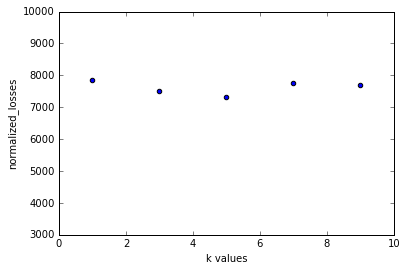

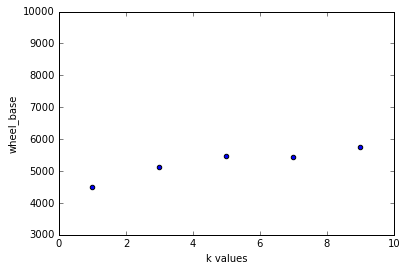

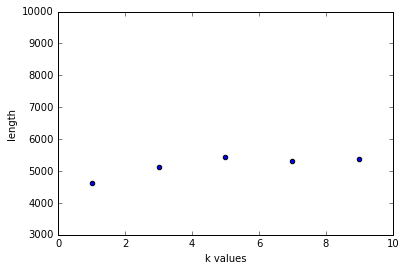

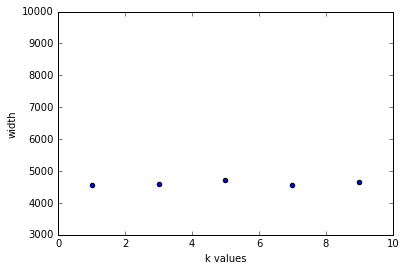

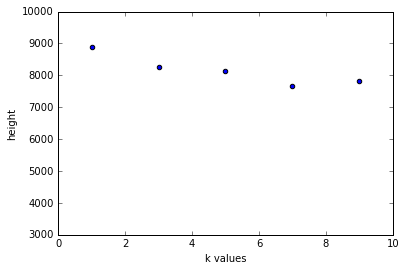

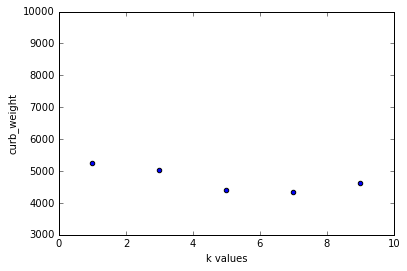

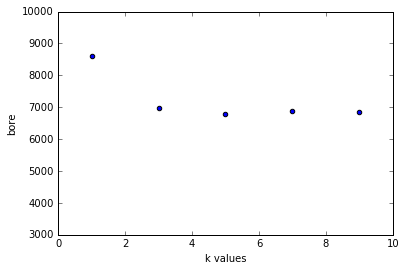

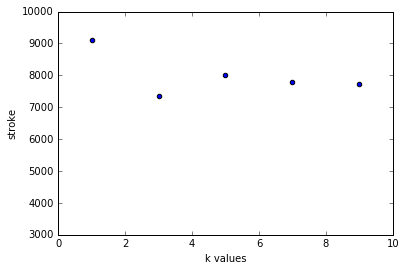

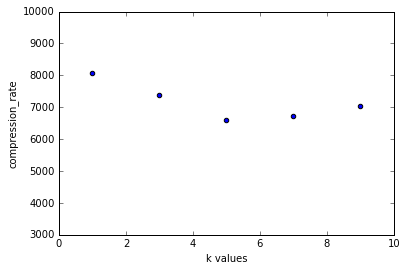

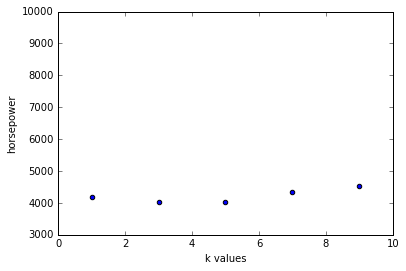

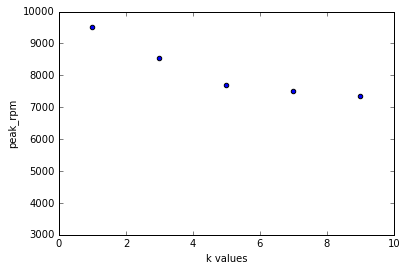

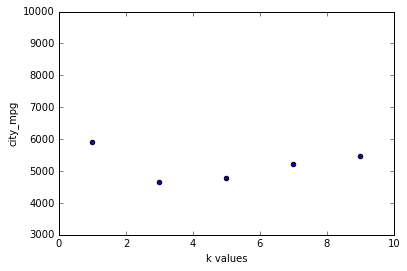

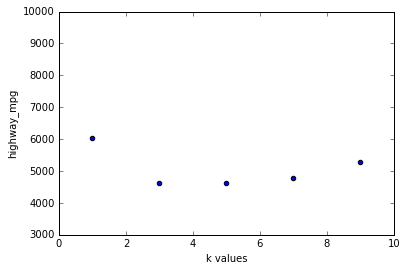

In [40]:
for f in feature_names:
    plt.scatter(x=k_neighbor_vals,y=rmses.loc[f])
    plt.xlabel("k values")
    plt.ylabel(f)
    plt.ylim(3000,10000)
    plt.show()
    

In [52]:
#modifying the model for multivariate,default k
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
#taking in list of features,for default k
def knn_train_test(feature_names,target,df):
    np.random.seed(1)
    #shuffling
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    #splitting
    row = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:row]
    test_df = rand_df[row:]
    #instantiation
    knn = KNeighborsRegressor()
    #fit
    knn.fit(train_df[feature_names],train_df[target])
    #predict
    predictions = knn.predict(test_df[feature_names])
    #error
    mse = mean_squared_error(test_df[target],predictions)
    rmse = np.sqrt(np.mean(mse))
    return rmse

#creating dict for each model we use with rmse
rmse_values = {}
#two best features from previous step
two_best = ["horsepower","curb_weight"]
rmse_values["two_best"] = knn_train_test(two_best,"price",numeric_cars)
#three best features from previous step
three_best = ["horsepower","curb_weight","highway_mpg"]
rmse_values["three_best"] = knn_train_test(three_best,"price",numeric_cars)
#four best features from previous step
four_best = ["horsepower","curb_weight","highway_mpg","width"]
rmse_values["four_best"] = knn_train_test(four_best,"price",numeric_cars)
#five
five_best = ["horsepower","curb_weight","highway_mpg","width","city_mpg"]
rmse_values["five_best"] = knn_train_test(five_best,"price",numeric_cars)
print(rmse_values)






{'two_best': 3257.849049435976, 'three_best': 3365.9110004529675, 'five_best': 3341.6024539726504, 'four_best': 3358.6915801682458}


# two best features from previous step, i.e. horsepower and curbweight give best RMSE val, for 2,3,4,5 at a time
# note-we could test with 2,3,4,5 features on changing features for every pnc

In [58]:
# Lets optimize the k val as well.
#vary k from 1 to 25 for three best models from last step- 2,4,5
#plot the rmse values

#modifying the multivariate model for diff k
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
#taking in list of features,for default k
def knn_train_test(feature_names,target,df,k):
    np.random.seed(1)
    #shuffling
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    #splitting
    row = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:row]
    test_df = rand_df[row:]
    #instantiation
    knn = KNeighborsRegressor(n_neighbors = k)
    #fit
    knn.fit(train_df[feature_names],train_df[target])
    #predict
    predictions = knn.predict(test_df[feature_names])
    #error
    mse = mean_squared_error(test_df[target],predictions)
    rmse = np.sqrt(np.mean(mse))
    return rmse

# for 3 models and various k values-starts here-----------------
model = [["horsepower","curb_weight"],
         ["horsepower","curb_weight","highway_mpg","width"],
         ["horsepower","curb_weight","highway_mpg","width","city_mpg"]]
#creating df for each model we use with rmse
k_varys = list(range(1,26))
top_3 =["two","five","four"]
rmse_values = pd.DataFrame(index=top_3,columns=k_varys)
rmse_values.fillna(0)

#loop for various k, and model types too- your own way.very good! :P
num = 0
for i in model:
    index_v = top_3[num]
    for j in k_varys:
        rmse_values.loc[index_v,j] = knn_train_test(i,"price",numeric_cars,j)
    num = num+1
#printing dataframe with rmse for each model as row and k values as columns
print(rmse_values)



           1        2        3        4        5        6        7        8   \
two   2790.11  2700.75  3003.75  3106.61  3257.85  3660.49  3776.62  3990.52   
five  2600.75  2725.43  3108.86  3217.31  3358.69  3633.17  3896.13  4002.84   
four  2530.06  2897.18  3183.46  3168.02   3341.6  3537.52  3817.29  4004.41   

           9        10   ...          16       17       18       19       20  \
two    4106.7  4292.93   ...     4616.72  4627.59   4591.4   4602.1  4609.45   
five  4055.53  4128.68   ...     4528.58  4572.29  4604.03  4660.52  4735.35   
four  3992.32  4138.73   ...     4553.56     4597  4655.28   4687.9  4712.02   

           21       22       23       24       25  
two   4643.49   4652.9  4697.63  4738.03  4760.49  
five  4742.33  4763.61  4807.08  4848.13  4873.61  
four  4755.86  4788.16  4806.92  4879.98  4923.84  

[3 rows x 25 columns]


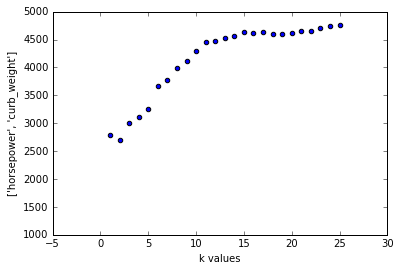

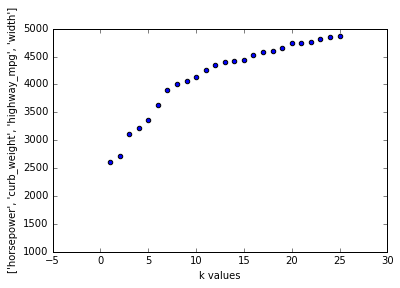

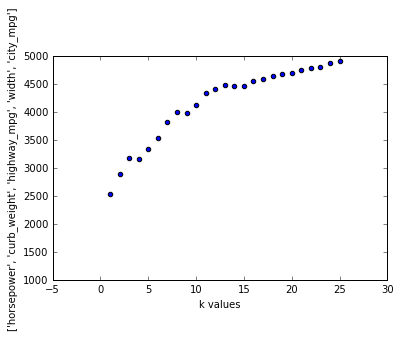

In [60]:
#visualizing
num = 0
for m in model:
    index_v = top_3[num]
    plt.scatter(x=k_varys,y=rmse_values.loc[index_v])
    plt.xlabel("k values")
    plt.ylabel(m)
    plt.ylim(1000,5000)
    plt.show()
    num = num+1

/dataquest/system/env/python3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


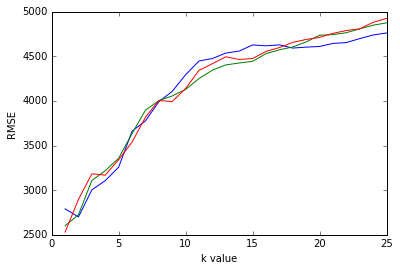

In [65]:
#line plot too
for m in top_3:
    x=k_varys
    y=list(rmse_values.loc[m,:])
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    num=num+1


# While for 4 and 5 best k=1 is giving lowest RMSE, 2 best has lowest RMSE for k=2